# Лабораторная работа №1
## Сравнение различных подходов к хешированию

Седунов Илья,<br>
Альперович Вадим,<br>
17ПМИ


**Целью данной работы является сравнение различных методов борьбы с коллизиями:**

1) Метод цепочек;

2) Метод открытой адресации (см. Кормен, 3-е издание, 11.4 Открытая адреация);

3) Метод кукушки (см. https://en.wikipedia.org/wiki/Cuckoo_hashing).

4) Для интереса, предлагается также сделать сравнения со стандартными средствами языка c++: std::map, std::hash_map. Вдруг получится их обогнать.

**Замечание:** В качестве хеш-функций используйте только функции из универсальных
семейств, про них рассказывалось на семинарах. Список универсальных хеш-функций
можно найти здесь https://en.wikipedia.org/wiki/Universal_hashing.


**Что измеряется?**

1) Время вставки;

2) Время удаления;

3) Время поиска.


**Более конкретно об измерении:**

Нужно выбрать какое-то стартовое значение N, скажем 100, выбрать шаг step, скажем пусть
step = 100, и выбрать максимальное значение, скажем 100 000. После чего нужно для каждого
N с шагом step от минимального значения до максимального построить таблицу размера N
(из случайных элементов, или сделать выборку из заранее подготовленной базы) и
произвести одну или несколько операций (если несколько, скажем 10, то нужно усреднить).
Измеряем именно время одной операции. Некоторые допускают ошибку и делают N вставок
с замером времени, но не понятно, что в итоге Вы измерили

**Входные данные:**

a) Случайные натуральные числа.

б) Случайные вектора или строки.

с) Очень бы хотелось увидеть как поведут себя таблицы на real life данных, например на
словарях или словах какого нибудь литературного произведения.

**Ваш вывод должен содержать:**

1) График зависимости скорости вставки от количества элементов в таблице;

2) График зависимости скорости удаления от количества элементов в таблице;

3) График зависимости скорости поиска от количества элементов в таблице;

На каждом графике должно быть несколько кривых, по одной или больше для каждого
подхода. Заметим также, что таблицы из подходов 1) и 2) имеют дополнительный параметр m
– ёмкость таблицы. Хорошо бы построить на графиках кривые для разных значений m,
например m = 2n, m = n, m = ½ n. Но это не обязательно.

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
performanceIntegerM2N = pd.read_csv('data/output/integerPerformanceM2N_1.csv')
performanceIntegerM2N['MtoN'] = performanceIntegerM2N['TableSize'] / performanceIntegerM2N['DataSize']

performanceStringM2N = pd.read_csv('data/output/stringPerformanceM2N_1.csv')
performanceStringM2N['MtoN'] = performanceStringM2N['TableSize'] / performanceStringM2N['DataSize']

performanceStringM2N.head()

,TableSize,DataSize,insertStdMap,searchStdMap,deleteStdMap,insertStdHashMap,searchStdHashMap,deleteStdHashMap,insertChained,searchChained,...,attemptsChained,insertOpened_quadratic,searchOpened_quadratic,deleteOpened_quadratic,attemptsOpened_quadratic,insertOpened_double,searchOpened_double,deleteOpened_double,attemptsOpened_double,MtoN
0,100,50,4.600000,1.800000,3.900000,4.533333,0.633333,1.266667,3.133333,4.500000,...,0.933333,4.800000,9.900000,8.466666,1.800000,7.366667,12.200000,10.333333,2.466667,2.0
1,200,100,5.166667,2.000000,4.166667,3.000000,0.633333,1.233333,2.833333,4.600000,...,0.900000,4.100000,5.666667,4.866667,0.800000,4.233333,7.433333,6.800000,1.300000,2.0
2,300,150,13.400000,3.800000,7.833333,3.800000,0.766667,1.633333,2.766667,4.233333,...,0.811111,3.966667,9.833333,13.566667,1.166667,5.033333,9.933333,10.333333,1.100000,2.0
3,400,200,5.066667,2.133333,4.666667,3.033333,0.633333,1.266667,2.866667,4.200000,...,0.744444,3.433333,6.366667,5.466667,0.966667,4.600000,8.100000,7.466667,1.333333,2.0
4,500,250,5.133333,2.600000,4.700000,3.600000,0.666667,1.466667,2.833333,4.133333,...,0.855556,4.033333,7.633333,6.766667,1.600000,3.900000,6.666667,5.833333,0.966667,2.0


## Performance on random integer numbers

Performance on random integer numbers


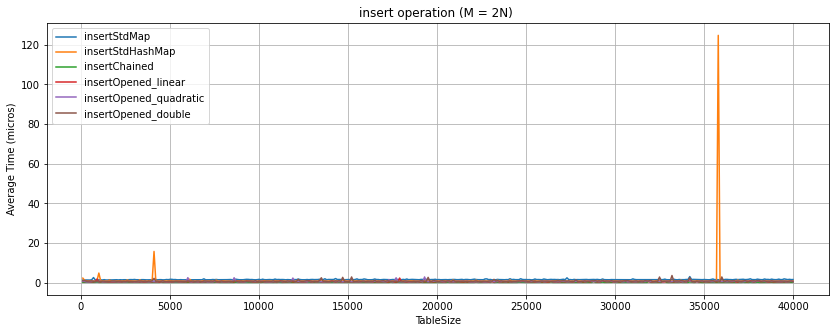

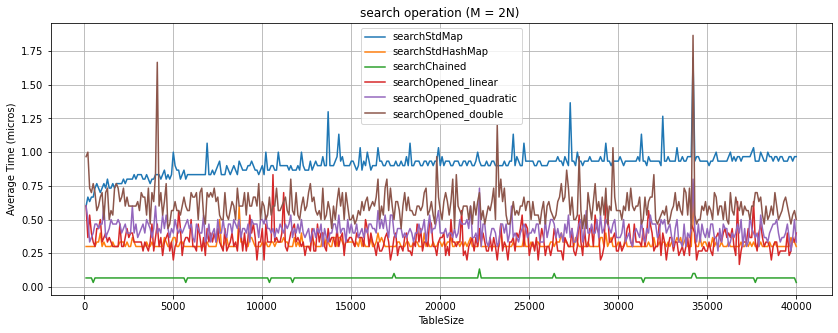

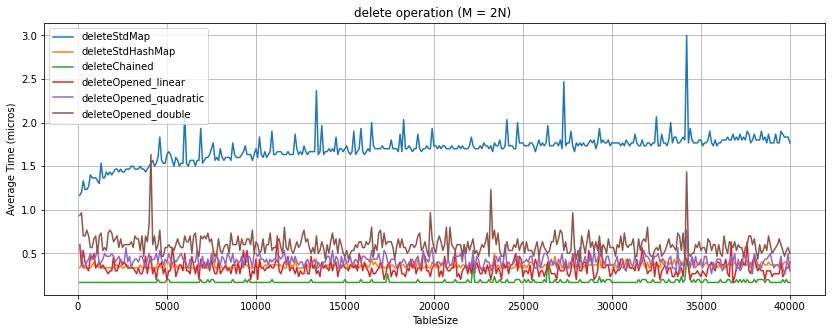

In [183]:
print('Performance on random integer numbers')
groups = {'insert': 
    ['insertStdMap', 'insertStdHashMap','insertChained', 'insertOpened_linear', 'insertOpened_quadratic', 'insertOpened_double'],
          'search': 
    ['searchStdMap', 'searchStdHashMap','searchChained', 'searchOpened_linear', 'searchOpened_quadratic', 'searchOpened_double'],
          'delete': 
    ['deleteStdMap', 'deleteStdHashMap','deleteChained', 'deleteOpened_linear', 'deleteOpened_quadratic', 'deleteOpened_double'],
}
for group in groups.keys():
    performanceIntegerM2N.plot(x='TableSize', 
                                y=groups[group], 
                                grid=True,
                                figsize=(14, 5)
                           )
    plt.title(group + ' operation (M = %dN) '%(performanceIntegerM2N['MtoN'].iloc[0]))
    plt.ylabel('Average Time (micros)')
    pass

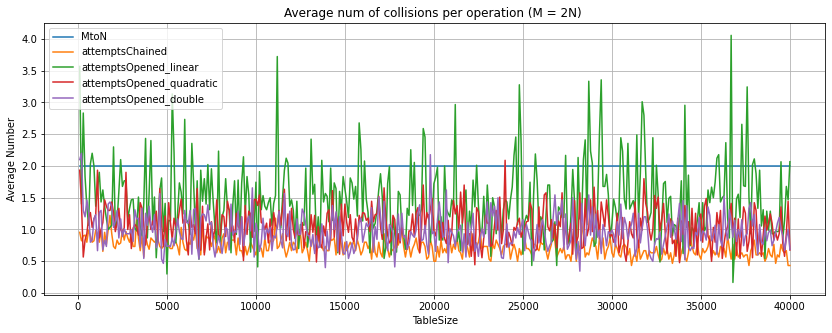

In [184]:
col = ['MtoN', 'attemptsChained', 'attemptsOpened_linear', 'attemptsOpened_quadratic', 'attemptsOpened_double']
performanceIntegerM2N.plot(x='TableSize', 
                           y=col, 
                           grid=True,
                           figsize=(14, 5)
                           )
plt.title('Average num of collisions per operation (M = %dN) '%(performanceIntegerM2N['MtoN'].iloc[0]))
plt.ylabel('Average Number')
pass

## Performance on random strings

Performance on random integer strings


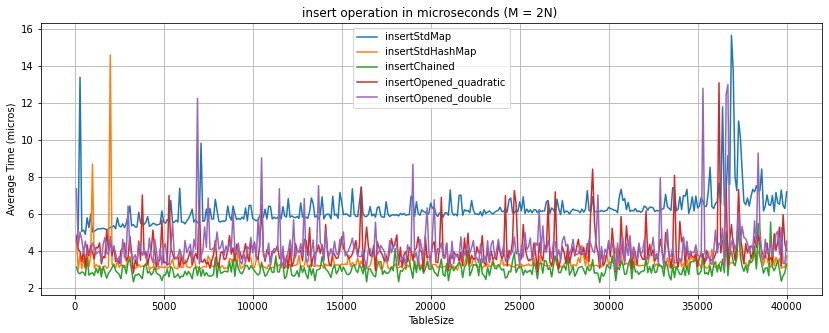

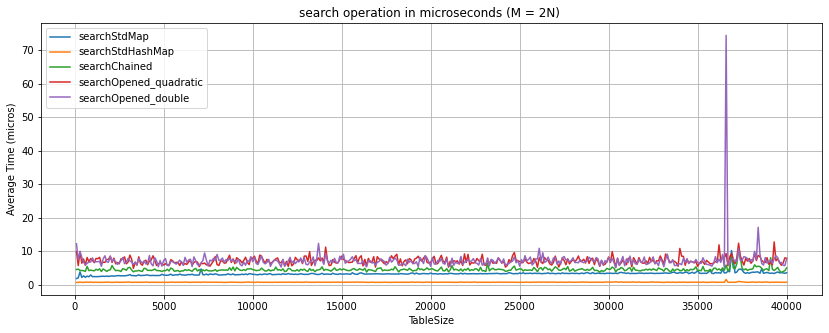

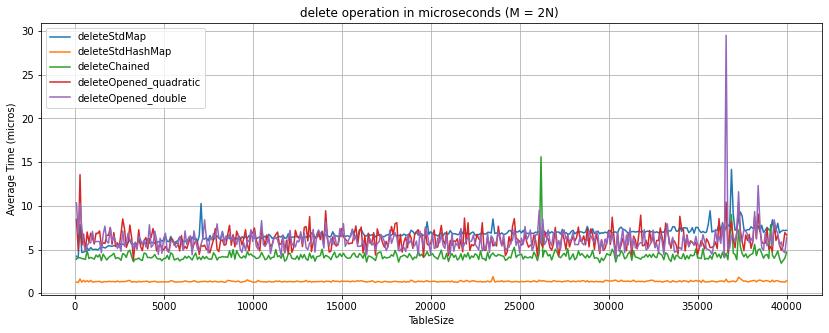

In [185]:
print('Performance on random integer strings')
groups = {'insert': 
          ['insertStdMap', 'insertStdHashMap','insertChained', 'insertOpened_quadratic', 'insertOpened_double'],
          'search': 
          ['searchStdMap', 'searchStdHashMap', 'searchChained',  'searchOpened_quadratic', 'searchOpened_double'],
          'delete': 
          ['deleteStdMap', 'deleteStdHashMap', 'deleteChained', 'deleteOpened_quadratic', 'deleteOpened_double'],
         }

for group in groups.keys():
    performanceStringM2N.plot(x='TableSize', 
                                y=groups[group], 
                                grid=True,
                                figsize=(14, 5)
                           )
    plt.title(group + ' operation in microseconds (M = 2N) ')
    plt.ylabel('Average Time (micros)')
    pass

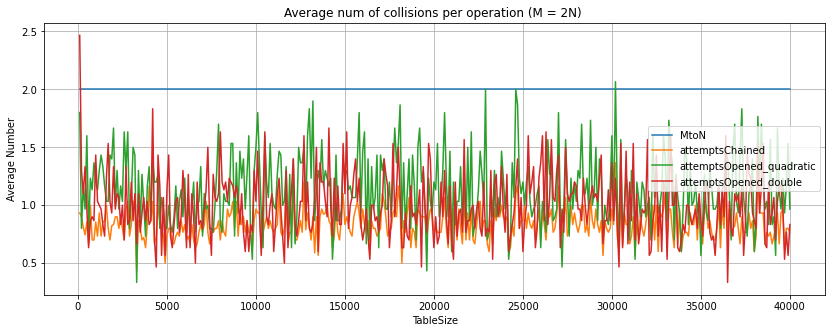

In [186]:
col = ['MtoN', 'attemptsChained',  'attemptsOpened_quadratic', 'attemptsOpened_double']
performanceStringM2N.plot(x='TableSize', 
                           y=col, 
                           grid=True,
                           figsize=(14, 5)
                           )
plt.title('Average num of collisions per operation (M = %dN) '%(performanceStringM2N['MtoN'].iloc[0]))
plt.ylabel('Average Number')
pass

## Real life data test

In [159]:
import random
import warnings
warnings.simplefilter('ignore')

# random.seed()
# file = pd.read_csv('data/input/dictionary.csv', sep=', ')
# newfile = file.drop('Unnamed: 0', axis=1)
# test_sample = newfile.sample(100)
# newfile = newfile.drop(test_sample.index)
# len(newfile)
# newfile.to_csv('data/input/dictionary.csv', sep=',')
# test_sample.to_csv('data/input/test_dictionary.csv', sep=',')

In [181]:
reallife = pd.read_csv('data/input/dictionary.csv')
reallife.head(10)

,Unnamed: 0,0
0,0,word
1,1,aardvark
2,2,aardwolf
3,3,aaron
4,4,aback
5,5,abacus
6,6,abaft
7,7,abalone
8,8,abandon
9,9,abandoned



**STD::MAP**

Average insert time: ```8.79 microsec```

Average search time: ```5.04 microsec```

Average delete time: ```7.87 microsec```

**STD::HASH_MAP**

Average insert time: 4.83 microsec

Average search time: 1.18 microsec

Average delete time: 1.81 microsec

**Chained Hash map**

Average insert time: 3.01 microsec

Average search time: 4.31 microsec

Average delete time: 4.69 microsec

N attempts per operation: 1

**Opened Hash map __QUADRATIC__**


Average insert time: 10.15 microsec

Average search time: 30.41 microsec

Average delete time: 20.6 microsec

N attempts: 6

**Opened Hash map __DOUBLE__**

Average insert time: 17.61 microsec

Average search time: 28.8 microsec

Average delete time: 22.16 microsec

N attempts: 6